In [16]:
import pandas as pd

# Sample DataFrame with names containing special characters
df = pd.read_csv('Indian_Names.csv')

remove_chars = "&(),/08["

# Remove the specified characters from the 'names' column
df['Name'] = df['Name'].str.translate(str.maketrans('', '', remove_chars))


ind = [w for w in df['Name'] if isinstance(w, str)]

In [17]:
ind

['aabid',
 'aabida',
 'aachal',
 'aadesh',
 'aadil',
 'aadish',
 'aaditya',
 'aaenab',
 'aafreen',
 'aafrin',
 'aaftaab',
 'aaftab',
 'aagand',
 'aahim',
 'aajad',
 'aajiv',
 'aakanksha',
 'aakar',
 'aakas',
 'aakash',
 'aakib',
 'aalam',
 'aalina',
 'aaliya',
 'aamil',
 'aamin',
 'aamina',
 'aamir',
 'aamod',
 'aamosh',
 'aamrin',
 'aanad',
 'aanamika',
 'aanand',
 'aanchal',
 'aanik',
 'aanil',
 'aansi',
 'aansu',
 'aanya',
 'aaradhana',
 'aarati',
 'aarav',
 'aardhna',
 'aarif',
 'aarifa',
 'aarifun',
 'aarju',
 'aarti',
 'aarushi',
 'aas',
 'aasa',
 'aash',
 'aasha',
 'aashi',
 'aashia',
 'aashif',
 'aashik',
 'aashis',
 'aashish',
 'aashiya',
 'aashma',
 'aashu',
 'aasif',
 'aasim',
 'aasish',
 'aasma',
 'aasmin',
 'aastha',
 'aasto',
 'aasu',
 'aatam',
 'aatif',
 'aatikun',
 'aatir',
 'aavesh',
 'aayana',
 'aayesha',
 'aaysha',
 'aayush',
 'aazad',
 'aazadi',
 'abash',
 'abbal',
 'abbas',
 'abdul',
 'abdulla',
 'abdullah',
 'abha',
 'abhaki',
 'abhash',
 'abhay',
 'abhaysingh',
 

In [20]:
oth = open('names.txt', 'r').read().splitlines()

In [22]:
words = oth + ind


In [27]:
max(len(w) for w in words)

19

In [28]:
len(words)

38518

In [29]:
for w in words[:1]:
    for ch1, ch2 in zip(w, w[1:]):
        print(ch1, ch2)


e m
m m
m a


In [30]:
b = {}
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [31]:
sorted(b.items(), key=lambda kv: -kv[1])

[(('a', '.'), 8198),
 (('n', '.'), 7389),
 (('a', 'n'), 6840),
 (('.', 'a'), 4998),
 (('a', 'r'), 4197),
 (('e', '.'), 4078),
 (('n', 'a'), 3690),
 (('r', 'i'), 3429),
 (('h', 'a'), 3415),
 (('i', '.'), 3408),
 (('r', 'a'), 3371),
 (('.', 'k'), 3343),
 (('e', 'l'), 3318),
 (('.', 's'), 3280),
 (('m', 'a'), 3220),
 (('.', 'm'), 3088),
 (('a', 'l'), 3078),
 (('l', 'e'), 3008),
 (('l', 'a'), 3007),
 (('e', 'n'), 2993),
 (('h', '.'), 2818),
 (('.', 'j'), 2719),
 (('l', 'i'), 2649),
 (('i', 'n'), 2605),
 (('a', 'h'), 2555),
 (('s', 'h'), 2522),
 (('y', 'a'), 2515),
 (('i', 'a'), 2484),
 (('o', 'n'), 2477),
 (('a', 'm'), 2293),
 (('e', 'r'), 2264),
 (('a', 'y'), 2192),
 (('.', 'r'), 2190),
 (('k', 'a'), 2132),
 (('y', '.'), 2127),
 (('n', 'i'), 2050),
 (('.', 'd'), 1986),
 (('n', 'n'), 1971),
 (('r', '.'), 1951),
 (('r', 'e'), 1877),
 (('y', 'n'), 1834),
 (('a', 'i'), 1832),
 (('j', 'a'), 1817),
 (('s', 'a'), 1806),
 (('e', 'e'), 1774),
 (('l', '.'), 1708),
 (('.', 'b'), 1704),
 (('.', 'l'),

In [32]:
import torch

In [33]:
chars = sorted(list(set(''.join(words))))
# chars = [char for char in chars if char.isalpha()]
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [34]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [35]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [36]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

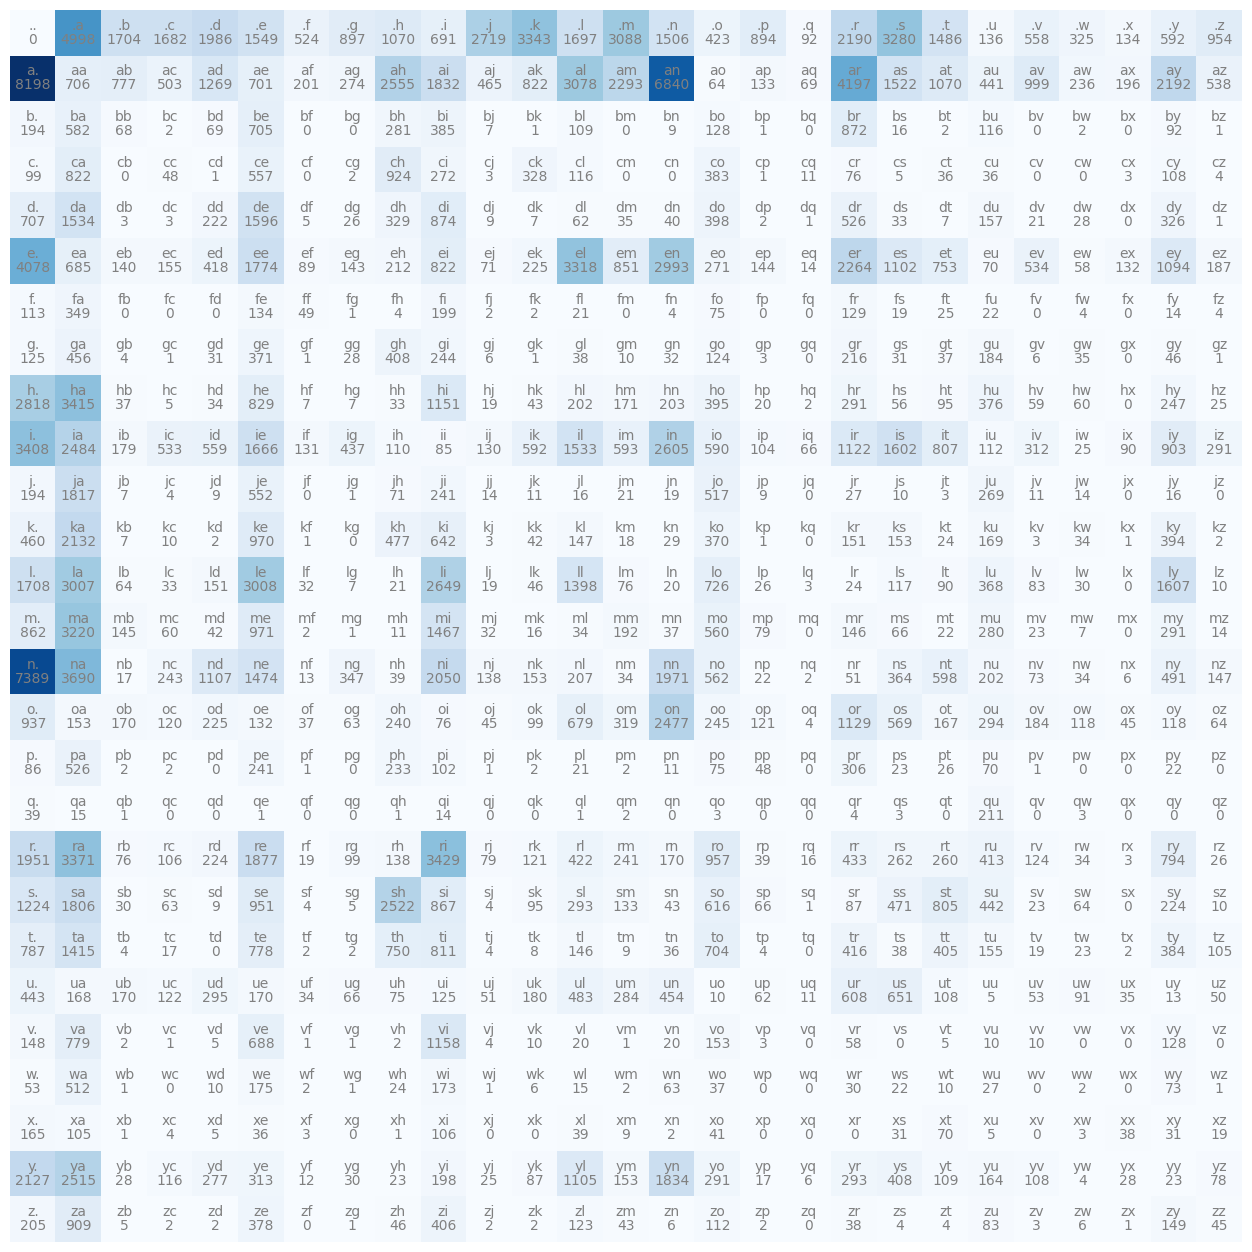

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [38]:
N[0]

tensor([   0, 4998, 1704, 1682, 1986, 1549,  524,  897, 1070,  691, 2719, 3343,
        1697, 3088, 1506,  423,  894,   92, 2190, 3280, 1486,  136,  558,  325,
         134,  592,  954], dtype=torch.int32)

In [39]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1298, 0.0442, 0.0437, 0.0516, 0.0402, 0.0136, 0.0233, 0.0278,
        0.0179, 0.0706, 0.0868, 0.0441, 0.0802, 0.0391, 0.0110, 0.0232, 0.0024,
        0.0569, 0.0852, 0.0386, 0.0035, 0.0145, 0.0084, 0.0035, 0.0154, 0.0248])

In [40]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [42]:
g = torch.Generator().manual_seed(214743647)

for i in range(10):
  
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

nerli.
ssh.
hnnjanat.
a.
meetacorsallitin.
jakylri.
deletyvel.
g.
ttisa.
zanl.


In [46]:
log_likelihood = 0.0
n = 0

for w in words:
# for w in ["rupesh"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-685005.3125)
nll=tensor(685005.3125)
2.483369827270508


In [47]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [48]:
xs

tensor([ 0,  5, 13, 13,  1])

In [49]:
ys


tensor([ 5, 13, 13,  1,  0])

In [50]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [51]:
xenc.shape

torch.Size([5, 27])

In [53]:
W = torch.randn((27, 27))
xenc @ W

tensor([[-8.5566e-01,  4.1474e-01,  9.1636e-02,  4.7037e-01,  5.5475e-01,
         -1.6352e+00,  1.9282e+00,  1.3830e+00, -6.7270e-01, -7.3546e-01,
         -1.1576e+00,  5.9126e-01,  1.3739e-02, -1.1460e+00,  1.2457e+00,
         -1.9030e+00, -7.3366e-01,  3.0294e+00, -1.2507e+00,  2.0352e+00,
          5.5510e-02, -8.1820e-01, -7.4164e-01,  2.1297e-01, -2.1902e-01,
         -1.0098e+00, -1.8298e-01],
        [-8.9537e-01, -6.4672e-02, -8.2581e-01,  9.1168e-01, -9.9893e-01,
          1.4341e+00,  2.7853e-01,  5.9710e-01, -8.1951e-01, -6.4083e-01,
         -2.9123e-01,  8.5661e-01,  1.0125e+00, -1.3311e-02, -1.0181e+00,
          6.0484e-02,  5.3006e-02,  7.4945e-02, -3.7808e-01, -1.3007e+00,
          5.7862e-01,  2.7012e+00,  1.0236e+00, -3.8499e-01, -6.2303e-01,
          1.2735e+00, -5.5647e-01],
        [-1.8000e+00,  9.0190e-02, -6.1342e-01,  7.1798e-01, -6.1965e-01,
         -5.0972e-01, -4.4484e-01, -6.6030e-01, -3.0939e-01, -1.2469e+00,
         -1.1463e+00, -7.6627e-01,  1.25

In [54]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0071, 0.0253, 0.0183, 0.0268, 0.0291, 0.0033, 0.1150, 0.0666, 0.0085,
         0.0080, 0.0053, 0.0302, 0.0169, 0.0053, 0.0581, 0.0025, 0.0080, 0.3458,
         0.0048, 0.1280, 0.0177, 0.0074, 0.0080, 0.0207, 0.0134, 0.0061, 0.0139],
        [0.0083, 0.0191, 0.0089, 0.0507, 0.0075, 0.0854, 0.0269, 0.0370, 0.0090,
         0.0107, 0.0152, 0.0479, 0.0560, 0.0201, 0.0074, 0.0216, 0.0215, 0.0219,
         0.0139, 0.0055, 0.0363, 0.3033, 0.0567, 0.0139, 0.0109, 0.0727, 0.0117],
        [0.0048, 0.0319, 0.0158, 0.0598, 0.0157, 0.0175, 0.0187, 0.0151, 0.0214,
         0.0084, 0.0093, 0.0136, 0.1028, 0.0961, 0.0189, 0.0486, 0.0204, 0.0139,
         0.0138, 0.0104, 0.0711, 0.0404, 0.0126, 0.0110, 0.0292, 0.2539, 0.0248],
        [0.0048, 0.0319, 0.0158, 0.0598, 0.0157, 0.0175, 0.0187, 0.0151, 0.0214,
         0.0084, 0.0093, 0.0136, 0.1028, 0.0961, 0.0189, 0.0486, 0.0204, 0.0139,
         0.0138, 0.0104, 0.0711, 0.0404, 0.0126, 0.0110, 0.0292, 0.2539, 0.0248],
        [0.0289, 0.0628,

In [55]:
probs[0].sum()

tensor(1.)

Neural Network with 27 neurons

In [56]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [86]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [87]:
print(loss.item())

3.629552125930786


In [88]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [89]:
W.data += -0.1 * W.grad

In [90]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  275837


In [106]:
# gradient descent
for k in range(200):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -1 * W.grad

2.5750410556793213
2.574976921081543
2.5749127864837646
2.5748488903045654
2.5747852325439453
2.574721574783325
2.574657678604126
2.574594497680664
2.574531078338623
2.574467658996582
2.574404239654541
2.574341297149658
2.5742781162261963
2.5742151737213135
2.5741519927978516
2.574089527130127
2.574026346206665
2.5739641189575195
2.573901414871216
2.573838949203491
2.573776960372925
2.5737144947052
2.573652505874634
2.5735902786254883
2.573528528213501
2.5734665393829346
2.5734047889709473
2.57334303855896
2.5732812881469727
2.5732197761535645
2.5731585025787354
2.573096990585327
2.573035955429077
2.572974681854248
2.572913646697998
2.572852373123169
2.572791576385498
2.5727310180664062
2.5726699829101562
2.5726094245910645
2.5725488662719727
2.572488307952881
2.572427988052368
2.5723676681518555
2.5723073482513428
2.5722475051879883
2.5721871852874756
2.5721275806427
2.5720674991607666
2.572007894515991
2.5719478130340576
2.5718884468078613
2.571828842163086
2.5717697143554688
2.57171

In [109]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
pxzfay.
a.
nn.
kai.
ritolian.
jgee.
ksahnaauyanilevias.
dbdainrwi.
ta.
sejaielylarte.
favmumerifontumjan.
nnsh.
jaruani.
core.
yaenon.
ka.
jabdinerimiin.
wynin.
